In [1]:
from datascience import *
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
baby = Table.read_table(path_data + 'baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


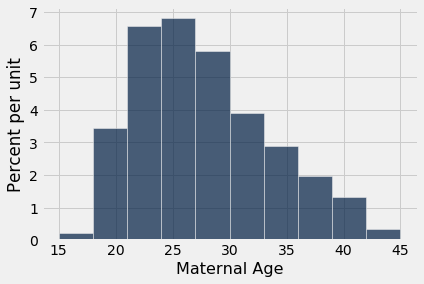

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
baby.select('Maternal Age').hist()

In [3]:
np.mean(baby.column('Maternal Age'))

27.228279386712096

In [0]:
def bootstrap_mean(original_sample, label, replications):
    """Returns an array of bootstrapped sample means:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        means = np.append(means, resampled_mean)
        
    return means

In [5]:
bstrap_means = bootstrap_mean(baby, 'Maternal Age', 5000)
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)

make_array(left, right)

array([26.89437819, 27.55792164])

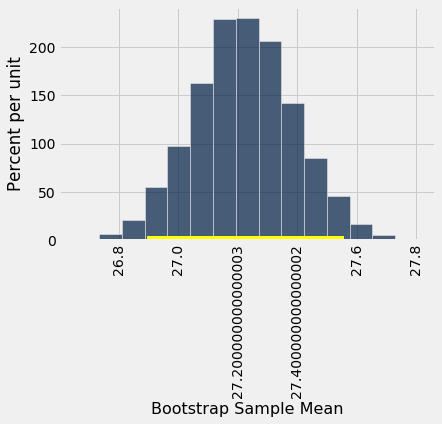

In [6]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist(bins=15)
plots.plot(make_array(left, right),
  make_array(0, 0), color='yellow', lw=8);

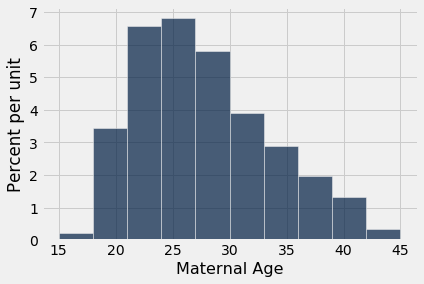

In [7]:
baby.select('Maternal Age').hist()

In [8]:
left_80 = percentile(10, bstrap_means)
right_80 = percentile(90, bstrap_means)
make_array(left_80, right_80)

array([27.0076661 , 27.44037479])

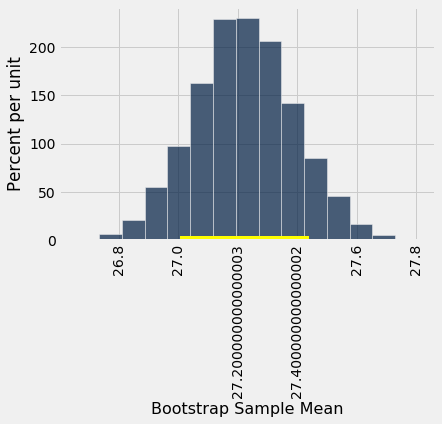

In [9]:
resampled_means.hist(bins=15)
plots.plot(make_array(left_80, right_80), 
  make_array(0, 0), color='yellow', lw=8);

In [10]:
smoking = baby.column('Maternal Smoker')
np.count_nonzero(smoking)/len(smoking)

0.3909710391822828

In [0]:
def bootstrap_proportion(original_sample, label, replications):
    """Returns an array of bootstrapped sample proportions:
    original_sample: table containing the original sample
    label: label of column containing the Boolean variable
    replications: number of bootstrap samples
    """
    just_one_column = original_sample.select(label)
    proportions = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resample_array = bootstrap_sample.column(0)
        resampled_proportion = np.count_nonzero(resample_array)/len(resample_array)
        proportions = np.append(proportions, resampled_proportion)
    return proportions

In [12]:
bstrap_props = bootstrap_proportion(baby, 'Maternal Smoker', 5000)
left = percentile(2.5, bstrap_props)
right = percentile(97.5, bstrap_props)
make_array(left, right)

array([0.3637138 , 0.41993186])

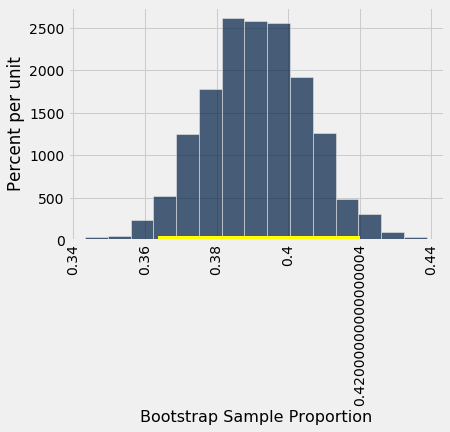

In [13]:
resampled_proportions = Table().with_column(
    'Bootstrap Sample Proportion', bstrap_props
)
resampled_proportions.hist(bins=15)
plots.plot(make_array(left, right), 
  make_array(0, 0), color='yellow', lw=8);